In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Overview of Supervised Learning

In supervised learning, we aim to use a set of input variables to predict one or more output variables. This process involves the following key concepts:

### Inputs and Outputs

1. **Inputs**: 
   - These are the variables used for making predictions. In the machine learning context, these can also be called predictors or features.
   
2. **Outputs**: 
   - These are the variables that we aim to predict. Outputs can be quantitative or qualitative.

### Variable Types

1. **Quantitative Outputs**: 
   - These are continuous measurements where values can be compared and ordered. For instance, predicting glucose levels.

2. **Qualitative Outputs**: 
   - These are categorical variables with a finite set of possible values, such as species of Iris or digits in handwritten digit recognition. These are also referred to as categorical or discrete variables.

3. **Ordered Categorical Variables**: 
   - These variables have an intrinsic order but no clear metric. Examples include ratings such as small, medium, and large.

### Coding Qualitative Variables

1. **Binary Coding**: 
   - For two categories (e.g., success/failure), we use binary digits (0 or 1).

2. **Dummy Variables**: 
   - For more than two categories, we use dummy variables where a qualitative variable with \( K \) levels is represented by a vector of \( K \) binary variables.

### Notation

- **Input Variable**: Denoted by \( X \). If \( X \) is a vector, its components are \( X_j \).
- **Quantitative Outputs**: Denoted by \( Y \).
- **Qualitative Outputs**: Denoted by \( G \).
- **Observed Values**: Written in lowercase (e.g., $ x_i $ for the \( i \)-th observed value).
- **Matrices**: Represented by bold uppercase letters (e.g., $ \mathbf{X} $ for a matrix of input vectors).

### Learning Task

Given an input vector \( X \), the goal is to predict the output \( Y \), denoted by $ \hat{Y} $ (pronounced "y-hat"). If \( Y \) is quantitative, \( \hat{Y} \) should also be quantitative. For categorical outputs, $ \hat{G} $ should match the set \( G \).

For binary classification, one approach is to treat the binary target \( Y \) as quantitative, with predictions $ \hat{Y} $ in the range \([0, 1]\). The class label $ \hat{G} $ can be assigned based on whether $ \hat{Y} > 0.5 $.

### Training Data

To build prediction rules, we need a dataset consisting of pairs $(x_i, y_i)$ or $(x_i, g_i)$, where $ i = 1, \ldots, N $. This dataset is known as the training data.


## Two Simple Approaches to Prediction: Least Squares and Nearest Neighbors

In this section, we develop two simple but powerful prediction methods: the linear model fit by least squares and the k-nearest-neighbor prediction rule. The linear model makes huge assumptions about structure and yields stable but possibly inaccurate predictions. The method of k-nearest neighbors makes very mild structural assumptions: its predictions are often accurate but can be unstable.

### Linear Models and Least Squares

The linear model has been a mainstay of statistics for the past 30 years and remains one of our most important tools. Given a vector of inputs $ \mathbf{X}^T = (X_1, X_2, \ldots, X_p) $, we predict the output $ Y $ via the model:

$$
\hat{Y} = \hat{\beta}_0 + \sum_{j=1}^{p} \hat{\beta}_j X_j
$$

The term $ \hat{\beta}_0 $ is the intercept, also known as the bias in machine learning. Often it is convenient to include the constant variable 1 in $ \mathbf{X} $, include $ \hat{\beta}_0 $ in the vector of coefficients $ \hat{\beta} $, and then write the linear model in vector form as an inner product:

$$
\hat{Y} = \mathbf{X}^T \hat{\beta}
$$

where $ \mathbf{X}^T $ denotes the vector or matrix transpose (with $ \mathbf{X} $ being a column vector). Here we are modeling a single output, so $ \hat{Y} $ is a scalar; in general $ \hat{Y} $ can be a \( K \)-vector, in which case $ \beta $ would be a $ p \times K $ matrix of coefficients. In the $ (p + 1) $-dimensional input-output space, $ (\mathbf{X}, \hat{Y}) $ represents a hyperplane. If the constant is included in $ \mathbf{X} $, then the hyperplane includes the origin and is a subspace; if not, it is an affine set cutting the \( Y \)-axis at the point $ (0, \hat{\beta}_0) $. From now on we assume that the intercept is included in $ \hat{\beta} $.

Viewed as a function over the \( p \)-dimensional input space, $ f(\mathbf{X}) = \mathbf{X}^T \beta $ is linear, and the gradient $ f'(\mathbf{X}) = \beta $ is a vector in input space that points in the steepest uphill direction.

How do we fit the linear model to a set of training data? There are many different methods, but by far the most popular is the method of least squares. In this approach, we pick the coefficients $ \beta $ to minimize the residual sum of squares:

$$
\text{RSS}(\beta) = \sum_{i=1}^{N} (y_i - \mathbf{x}_i^T \beta)^2
$$

RSS(\(\beta\)) is a quadratic function of the parameters, and hence its minimum always exists, but may not be unique. The solution is easiest to characterize in matrix notation. We can write:

$$
\text{RSS}(\beta) = (y - X \beta)^T (y - X \beta)
$$

where \( X \) is an \( N \times p \) matrix with each row an input vector, and \( y \) is an \( N \)-vector of the outputs in the training set. Differentiating with respect to \( \beta \), we get the normal equations:

$$
X^T (y - X \beta) = 0
$$

If $ X^T X $ is nonsingular, then the unique solution is given by:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

and the fitted value at the $ i $-th input $ \mathbf{x}_i $ is:

$$
\hat{y}_i = \hat{y}(\mathbf{x}_i) = \mathbf{x}_i^T \hat{\beta}
$$

At an arbitrary input \( \mathbf{x}_0 \), the prediction is:

$$
\hat{y}(\mathbf{x}_0) = \mathbf{x}_0^T \hat{\beta}
$$

The entire fitted surface is characterized by the \( p \) parameters $ \hat{\beta} $. Intuitively, it seems that we do not need a very large data set to fit such a model.

Let’s look at an example of the linear model in a classification context. Figure 2.1 shows a scatterplot of training data on a pair of inputs $ X_1 $ and $ X_2 $. The data are simulated, and for the present, the simulation model is not important. The output class variable $ G $ has the values BLUE or ORANGE, and is represented as such in the scatterplot. There are 100 points in each of the two classes. The linear regression model was fit to these data, with the response \( Y \) coded as 0 for BLUE and 1 for ORANGE. The fitted values $ \hat{Y} $ are converted to a fitted class variable $ \hat{G} $ according to the rule:

$$
\hat{G} = \begin{cases}
\text{ORANGE} & \text{if } \hat{Y} > 0.5 \\
\text{BLUE} & \text{if } \hat{Y} \leq 0.5
\end{cases}
$$
![Linear Regression Example](1.1.png)

Figure 1.  A classification example in two dimensions. The classes are coded
as a binary variable (BLUE = 0, ORANGE = 1), and then fit by linear regression.
The line is the decision boundary defined by xT β̂ = 0.5. The orange shaded region
denotes that part of input space classified as ORANGE, while the blue region is
classified as BLUE.


Mean Squared Error: 1.04
R^2 Score: 0.74


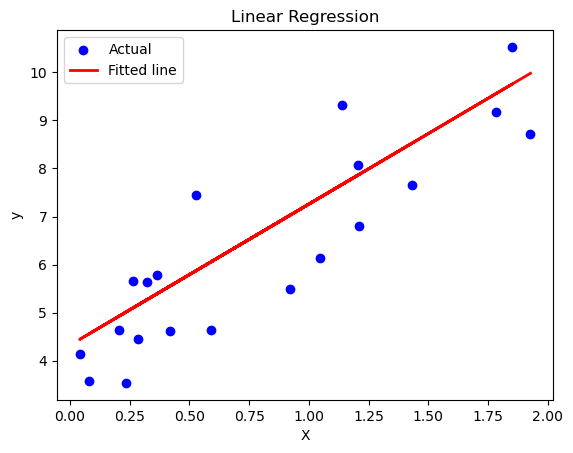

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seed for reproducibility
np.random.seed(0)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Seed for reproducibility
np.random.seed(0)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


### Linear Regression Parameter Calculation

To calculate the parameters $\theta_0$ and $\theta_1$ for the linear regression model, follow these steps:

1. **Calculate Sums**

   Compute the necessary sums:
   $$
   \sum x_i
   $$
   $$
   \sum y_i
   $$
   $$
   \sum x_i y_i
   $$
   $$
   \sum x_i^2
   $$

2. **Calculate $\theta_1$**

   Use the formula for $\theta_1$:
   $$
   \theta_1 = \frac{n \sum (x_i y_i) - \sum x_i \sum y_i}{n \sum (x_i^2) - (\sum x_i)^2}
   $$

3. **Calculate $\theta_0$**

   Use the formula for $\theta_0$:
   $$
   \theta_0 = \frac{\sum y_i - \theta_1 \sum x_i}{n}
   $$

This will yield the best-fit values for the parameters $\theta_0$ and $\theta_1$ in the linear regression model.


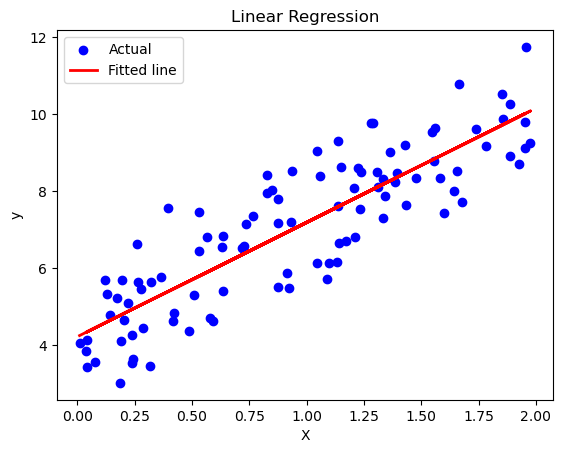

In [2]:
# Add bias term (intercept) to the input data
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance

# Calculate theta using the Normal Equation
X_b_transpose = X_b.T
theta = np.linalg.inv(X_b_transpose.dot(X_b)).dot(X_b_transpose).dot(y)

# Predict using the calculated parameters
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
    return X_b.dot(theta)

y_pred = predict(X, theta)
# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()



### Decision Boundary and Misclassifications

The set of points classified as ORANGE corresponds to 
$$
\{ x : x^T \hat{\beta} > 0.5 \}
$$
as indicated in Figure 2.1. The decision boundary separating the two predicted classes is given by
$$
\{ x : x^T \hat{\beta} = 0.5 \}
$$
which is linear in this case. It is evident that there are several misclassifications on both sides of the decision boundary. This raises the question: Is our linear model too rigid, or are such errors unavoidable?

**Training Data Scenarios**

Consider the following two scenarios:

**Scenario 1:** 
The training data for each class were generated from bivariate Gaussian distributions with uncorrelated components and different means.

**Scenario 2:** 
The training data for each class came from a mixture of 10 low-variance Gaussian distributions, with individual means themselves distributed as Gaussian. 

A mixture of Gaussians is best described by the generative model, where:
1. A discrete variable determines which of the component Gaussians to use.
2. An observation is generated from the chosen density.

In the case of a single Gaussian per class, it is shown in Chapter 4 that a linear decision boundary is the best one can do, and our estimate is almost optimal. The region of overlap between the classes is inevitable, and future data will also be affected by this overlap.

In the case of mixtures of tightly clustered Gaussians, a linear decision boundary is unlikely to be optimal. The optimal decision boundary in this scenario is nonlinear and disjoint, which will be much more challenging to determine.

We now turn to a classification and regression procedure that is more suited to the second scenario, which is at the opposite end of the spectrum compared to the linear model.


### Nearest-Neighbor Methods

Nearest-neighbor methods use observations in the training set \( T \) that are closest in input space to \( x \) to form $ \hat{Y} $. Specifically, the \( k \)-nearest neighbor fit for $ \hat{Y} $ is defined as follows:

$$
\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i
$$

where \( N_k(x) \) is the neighborhood of \( x \) defined by the \( k \) closest points \( x_i \) in the training sample. Closeness implies a metric, which for the moment we assume is Euclidean distance. In other words, we find the \( k \) observations with \( x_i \) closest to \( x \) in input space, and average their responses.

In Figure 1.2, we use the same training data as in Figure 1.1 and apply 15-nearest-neighbor averaging of the binary coded response as the method of fitting. Thus, \( \hat{Y} \) is the proportion of ORANGE’s in the neighborhood, and assigning class ORANGE to \( \hat{G} \) if \( \hat{Y} > 0.5 \) amounts to a majority vote in the neighborhood. The colored regions indicate all those points in input space classified as BLUE or ORANGE by such a rule, which are found by evaluating the procedure on a fine grid in input space. The decision boundaries that separate the BLUE from the ORANGE regions are far more irregular, responding to local clusters where one class dominates.

Figure 1.2 shows the results for 1-nearest-neighbor classification: $ \hat{Y} $ is assigned the value $ y_l $ of the closest point $ x_l $ to \( x \) in the training data. In this case, the regions of classification can be computed relatively easily and correspond to a Voronoi tessellation of the training data. Each point $ x_i $ has an associated tile bounding the region for which it is the closest input point. For all points \( x \) in the tile, $ \hat{G}(x) = g_i $. The decision boundary is even more irregular than before.

The method of \( k \)-nearest-neighbor averaging is defined in exactly the same way for regression of a quantitative output \( Y \), although \( k = 1 \) would be an unlikely choice.
![Linear Regression Example](1.2.png)
FIGURE 1.2. The same classification example in two dimensions as in Fig-
ure 1.1. The classes are coded as a binary variable (BLUE = 0, ORANGE = 1) and
then fit by 15-nearest-neighbor averaging as in (2.8). The predicted class is hence
chosen by majority vote amongst the 15-nearest neighbors.

In Figure 2.2, we observe that far fewer training observations are misclassified compared to Figure 2.1. However, this should not be a cause for excessive optimism, as Figure 2.3 shows that none of the training data are misclassified. It is reasonable to infer that for \( k \)-nearest-neighbor fits, the error on the training data is approximately an increasing function of \( k \), and will always be zero for \( k = 1 \). An independent test set would provide a more satisfactory means of comparing different methods.

Although \( k \)-nearest-neighbor fits have a single parameter, the number of neighbors \( k \), compared to the \( p \) parameters in least-squares fits, the effective number of parameters in \( k \)-nearest neighbors is $ \frac{N}{k} $, which is generally greater than \( p \) and decreases with increasing \( k \). To understand why, note that if the neighborhoods were non-overlapping, there would be $ \frac{N}{k} $ neighborhoods, and we would fit one parameter (a mean) in each neighborhood.

It is clear that we cannot use sum-of-squared errors on the training set as a criterion for choosing \( k \), since this would always lead to selecting \( k = 1 \)! It seems that \( k \)-nearest-neighbor methods are more appropriate for the mixture Scenario 2 described above. In contrast, for Gaussian data, the decision boundaries of \( k \)-nearest neighbors would be unnecessarily noisy.
![Linear Regression Example](1.3.png)
FIGURE 1.3. The same classification example in two dimensions as in Fig-
ure 2.1. The classes are coded as a binary variable (BLUE = 0, ORANGE = 1), and
then predicted by 1-nearest-neighbor classification.

In [4]:
import numpy as np

class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        """
        Store the training data and labels.

        Parameters:
        X (numpy.ndarray): Training feature data of shape (n_samples, n_features).
        y (numpy.ndarray): Training labels of shape (n_samples,).
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict the labels for the test data.

        Parameters:
        X (numpy.ndarray): Test feature data of shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Predicted labels for the test data.
        """
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        """
        Predict the label for a single sample.

        Parameters:
        x (numpy.ndarray): Single test sample of shape (n_features,).

        Returns:
        int: Predicted label.
        """
        # Compute distances from x to all examples in the training set
        distances = np.linalg.norm(self.X_train - x, axis=1)
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        # Return the most common class label among the k neighbors
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Example Usage
if __name__ == "__main__":
    # Sample data
    X_train = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7]])
    y_train = np.array([0, 0, 1, 1, 1])
    X_test = np.array([[2, 2], [6, 6]])

    # Initialize and train the model
    knn = KNearestNeighbors(k=3)
    knn.fit(X_train, y_train)

    # Predict on new data
    y_pred = knn.predict(X_test)
    print("Predictions:", y_pred)


Predictions: [0 1]


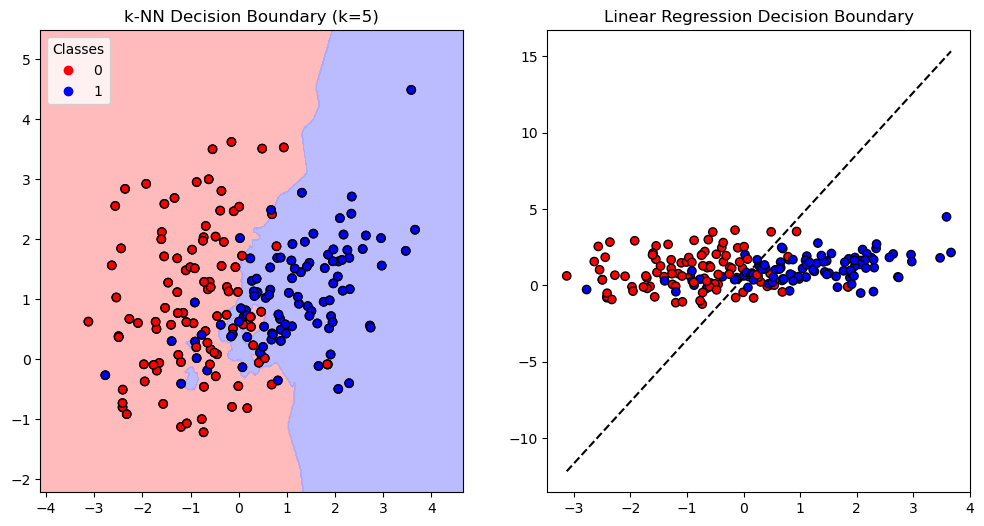

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate synthetic data
def generate_data():
    X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                               n_clusters_per_class=1, n_classes=2, flip_y=0, random_state=42)
    return X, y

# Linear Regression Implementation
class LinearRegression:
    def fit(self, X, y):
        """
        Fit the linear regression model.
        """
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
        self.theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        """
        Predict using the linear regression model.
        """
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
        return X_b @ self.theta

# k-Nearest Neighbors Implementation
class KNearestNeighbors:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        return np.bincount(k_nearest_labels).argmax()

# Plot Decision Boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(['#FF0000', '#0000FF']))
    ax.set_title(title)
    ax.legend(*scatter.legend_elements(), title="Classes")

# Main
def main():
    X, y = generate_data()
    
    # Linear Regression Model
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    predictions_lin_reg = (lin_reg.predict(X) > 0.5).astype(int)
    
    # k-Nearest Neighbors Model
    knn = KNearestNeighbors(k=5)
    knn.fit(X, y)
    predictions_knn = knn.predict(X)
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    plot_decision_boundaries(X, y, knn, axes[0], "k-NN Decision Boundary (k=5)")
    axes[0].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(['#FF0000', '#0000FF']))
    
    # For Linear Regression, we use a decision boundary where the predicted probability is 0.5
    decision_boundary_X = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    decision_boundary_Y = (0.5 - lin_reg.theta[0] - lin_reg.theta[1] * decision_boundary_X) / lin_reg.theta[2]
    axes[1].plot(decision_boundary_X, decision_boundary_Y, 'k--')
    
    axes[1].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(['#FF0000', '#0000FF']))
    axes[1].set_title("Linear Regression Decision Boundary")
    
    plt.show()

if __name__ == "__main__":
    main()
